## Importing Libraries

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [52]:
data = pd.read_csv("insurance.csv")

In [53]:
data.sample(5)

,age,sex,bmi,children,smoker,region,charges
429,27,female,30.400,3,no,northwest,18804.75240
1119,30,female,19.950,3,no,northwest,5693.43050
884,25,male,26.695,4,no,northwest,4877.98105
1293,46,male,25.745,3,no,northwest,9301.89355
1226,38,male,16.815,2,no,northeast,6640.54485


## Data Cleaning

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [56]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Feature Engineering

In [57]:
Male = pd.get_dummies(data["sex"], drop_first = True)
data = pd.concat([data, Male], axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [58]:
Smoker = pd.get_dummies(data["smoker"], drop_first = True)
data = pd.concat([data, Smoker], axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [59]:
data = data.rename(columns = {"yes" : "Somker"})
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Somker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [60]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [61]:
Region = pd.get_dummies(data["region"], drop_first = True)
data = pd.concat([data, Region], axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Somker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


## Exploratory Analysis

## Distribution of sex parameter

In [62]:
data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

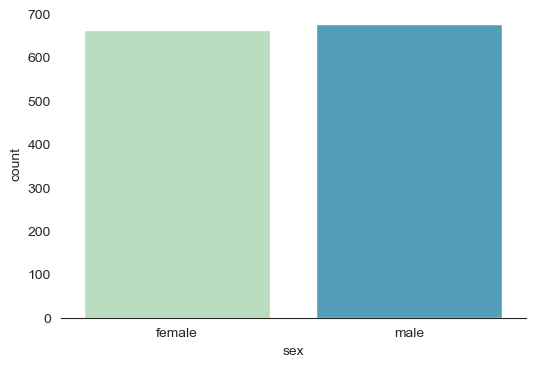

In [64]:
plt.figure(figsize = (6,4))
sns.set_style("white")
sns.countplot(x = "sex", data = data, palette = "GnBu")
sns.despine(left = True)

## Relationship of smoking and Gender to Charges

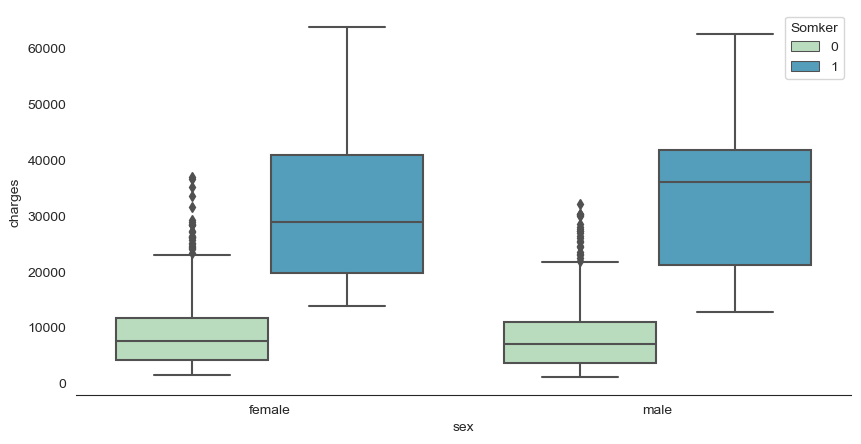

In [72]:
plt.figure(figsize = (10,5))
sns.set_style("white")
sns.boxplot(x = "sex",y = "charges", data = data, palette = "GnBu",hue = "Somker")
sns.despine(left = True)

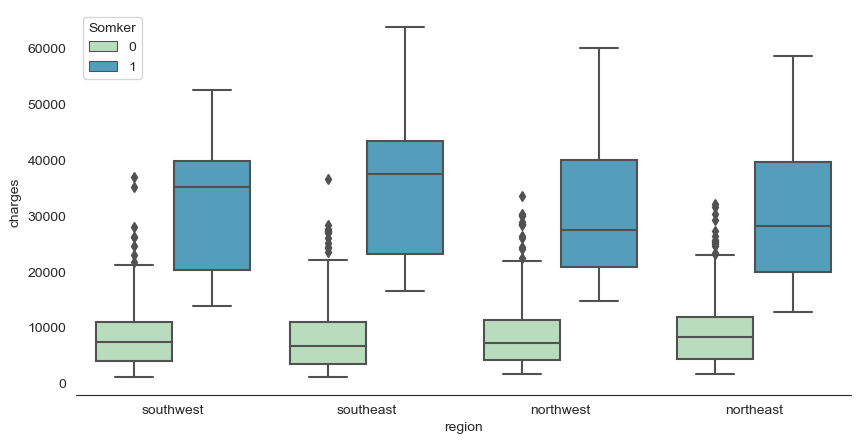

In [87]:
plt.figure(figsize = (10,5))
sns.set_style("white")
sns.boxplot(x = "region",y = "charges", data = data, palette = "GnBu",hue = "Somker")
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

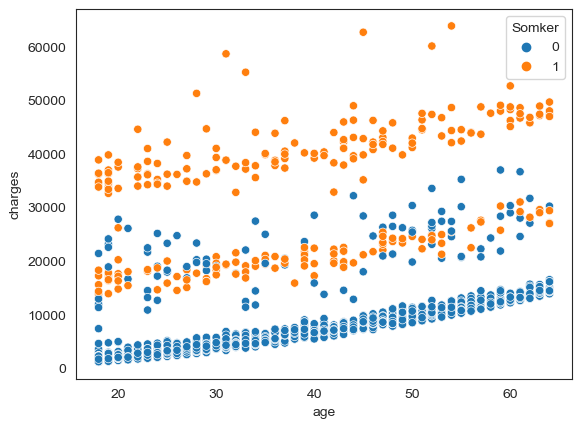

In [91]:
sns.scatterplot(x = "age", y = "charges", data = data,hue = "Somker")

## Efftects On BMI

<Axes: xlabel='bmi', ylabel='charges'>

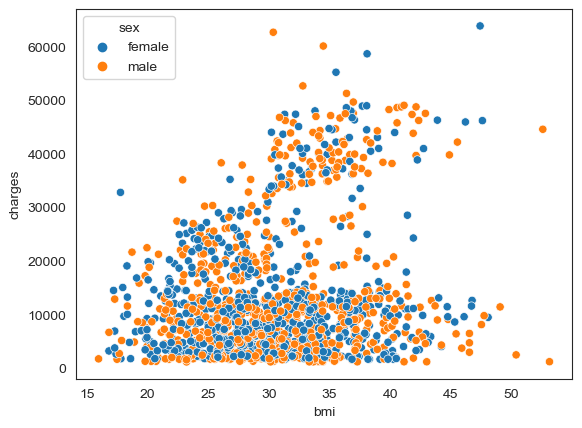

In [94]:
sns.scatterplot(x = "bmi", y = "charges", data = data,hue = "sex")

<Axes: xlabel='bmi', ylabel='charges'>

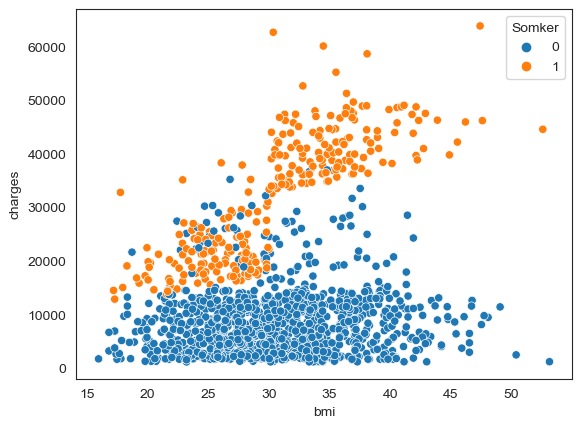

In [95]:
sns.scatterplot(x = "bmi", y = "charges", data = data,hue = "Somker")

<Axes: xlabel='bmi', ylabel='charges'>

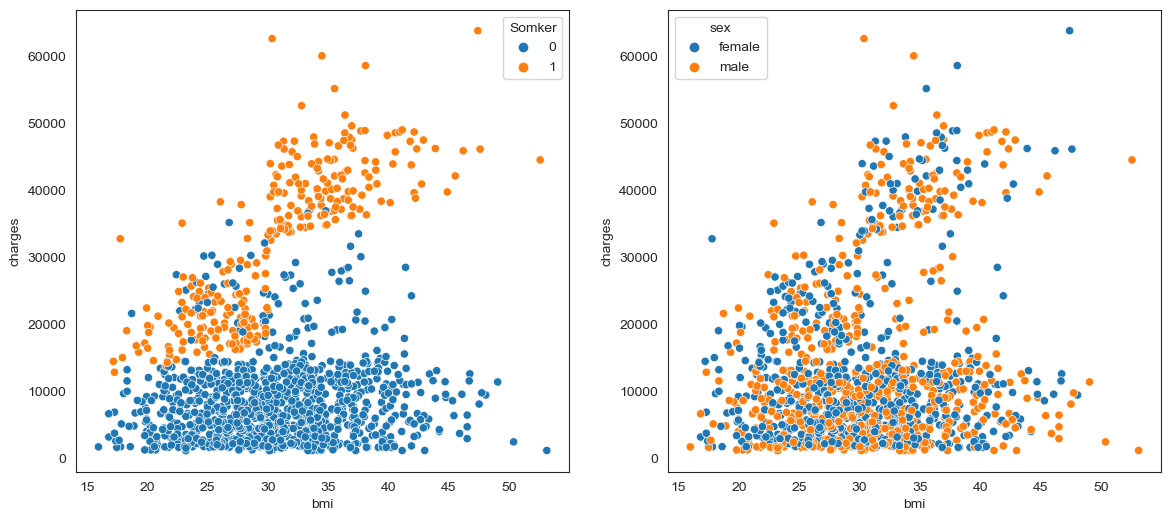

In [100]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
sns.scatterplot(x = "bmi", y = "charges", data = data,hue = "Somker", ax = ax[0])
sns.scatterplot(x = "bmi", y = "charges", data = data,hue = "sex", ax = ax[1])

In [102]:
data.drop(["sex", "smoker", "region"], axis = 1, inplace = True)

In [103]:
data.head()

,age,bmi,children,charges,male,Somker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<Axes: >

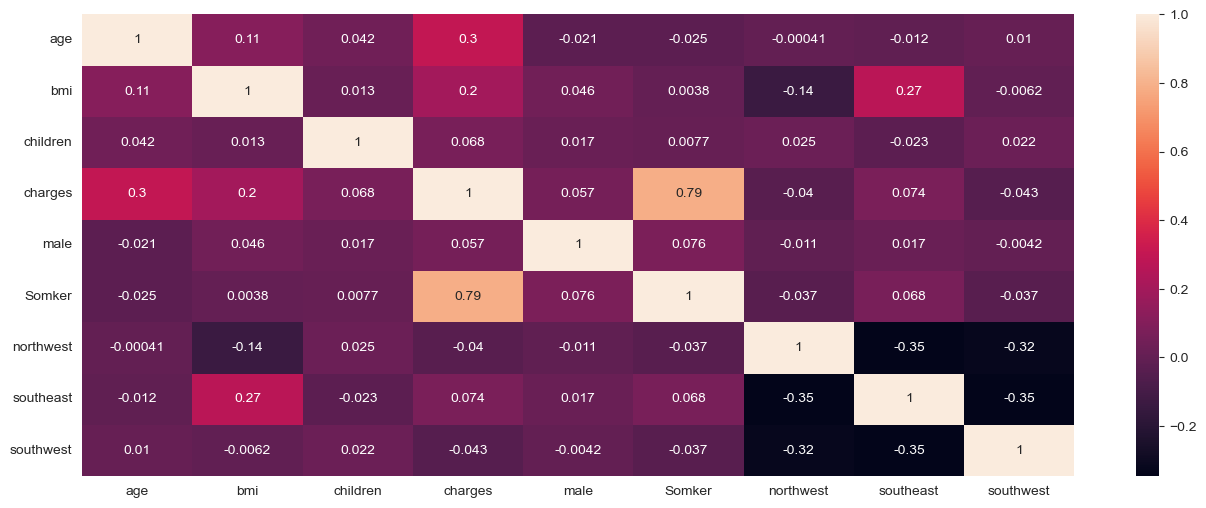

In [106]:
plt.figure(figsize = (16,6))
sns.heatmap(data.corr(), annot = True)

In [107]:
data.corr()

,age,bmi,children,charges,male,Somker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Somker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


## Splitting data

In [108]:
x = data.drop("charges", axis = 1)
y = data["charges"]

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [111]:
x_train.shape

(802, 8)

In [112]:
x_test.shape

(536, 8)

In [114]:
y_train.shape

(802,)

In [115]:
y_test.shape

(536,)

## Scaling the data

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [134]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

# <font color = "green">Support Vector Regression Model</font>

In [135]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train, y_train)

SVR()

In [136]:
predict = regressor.predict(scaled_x_test)

In [137]:
predict.shape

(536,)

In [138]:
y_test.shape

(536,)

In [139]:
predict[:10]

array([9673.46039978, 9686.8749098 , 9640.77656618, 9672.38879857,
       9652.50158356, 9653.07911062, 9691.82056549, 9649.57607482,
       9678.09889915, 9663.2262835 ])

In [143]:
y_test[:10]

540      6196.44800
1148    10791.96000
106      2331.51900
383      5846.91760
189      4922.91590
1286     3732.62510
111     11881.35800
426      6555.07035
81       7935.29115
372      7639.41745
Name: charges, dtype: float64

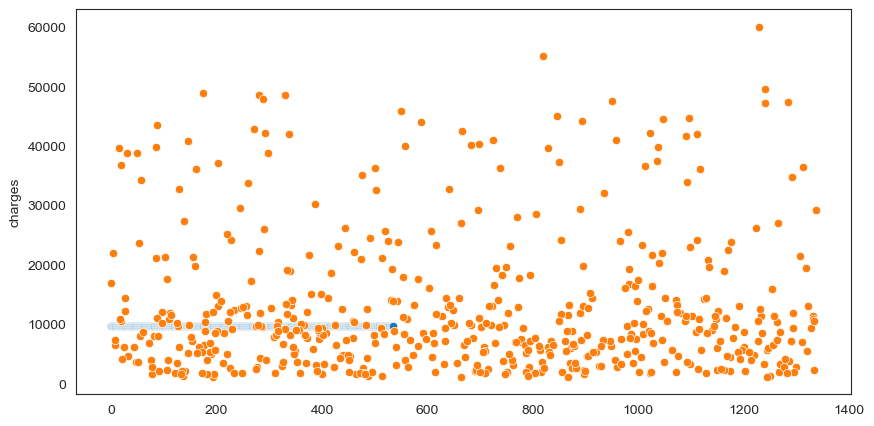

In [155]:
plt.figure(figsize = (10,5))
sns.scatterplot(predict)
sns.scatterplot(y_test)
plt.show()

<Axes: ylabel='charges'>

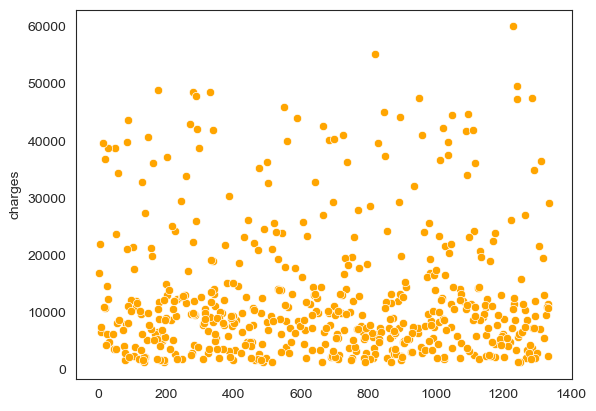

In [164]:
sns.scatterplot(y_test, color = "orange")

<Axes: >

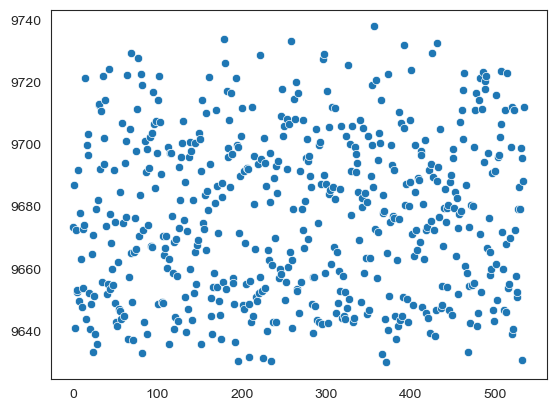

In [165]:
sns.scatterplot(predict)